# Verify that the implementation of the radial velocity uncertainty model is correct

This notebook illustrates the use of the radial velocity uncertainty modules and also serves as a check that the PyGaia code correctly implements the incertainty model from the [Gaia science performance pages](https://www.cosmos.esa.int/web/gaia/science-performance#spectroscopic%20performance). The resulting plots can also be compared to the plots in the Gaia DR3 processing paper by [Katz et al. (2022)](https://ui.adsabs.harvard.edu/abs/2022arXiv220605902K/abstract).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import ujson, os

from IPython.display import display, Markdown

from astropy.visualization import HistEqStretch, ImageNormalize, LogStretch

from pygaia.errors.spectroscopic import radial_velocity_uncertainty as vradunc

plt.style.use("./agab.mplstyle")

## Specific test cases as spot checks

Calculate the radial velocity uncertainties for specific values of $G_\mathrm{RVS}$, $T_\mathrm{eff}$, and $\log g$. This serves to check that the code works and produces reasonable results. More comprehensive checks below.

In [2]:
grvs = 14.0
teff = 4600.0
logg = 1.0

svrad = vradunc(grvs, teff, logg, release="dr3")
display(Markdown(rf"$\sigma_{{v_\mathrm{{rad}}}} = {svrad:.1f}$ km s$^{{-1}}$"))

$\sigma_{v_\mathrm{rad}} = 5.6$ km s$^{-1}$

## Plots of the uncertainty models

The plots show the model uncerainty as a function of magnitude. The magnitude range used in the plotting code is $[5,16.5]$ so the results can be used to verify that no radial velocity uncertainties are produced for magnitudes outside the validity ranges.

### Gaia DR3 uncertainty models

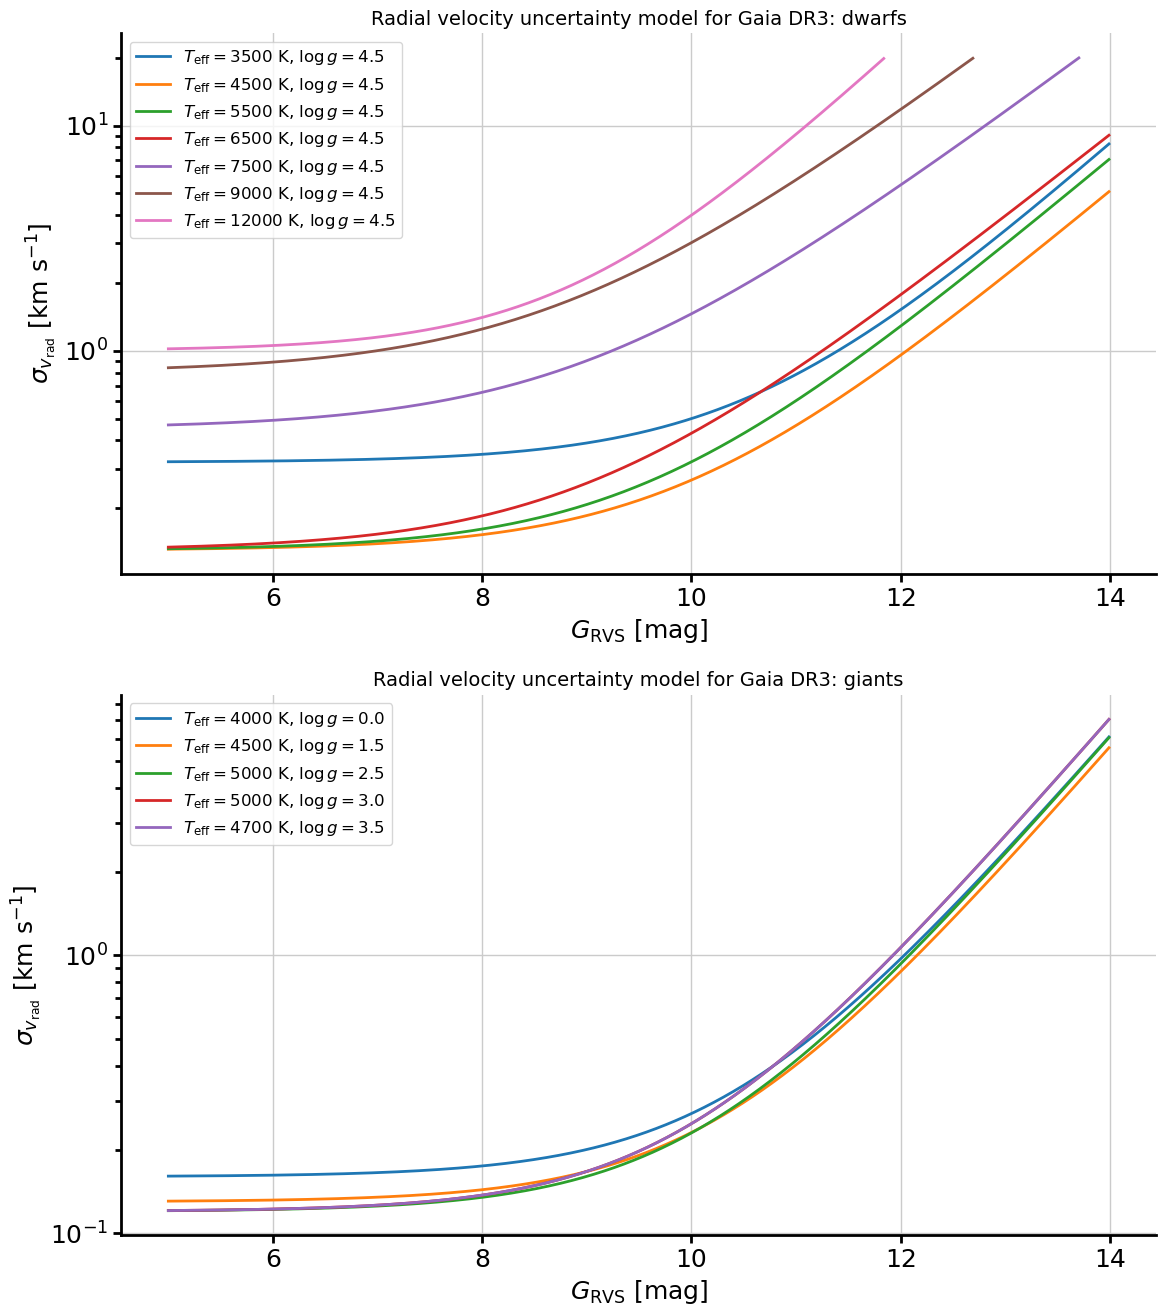

In [3]:
fig, axdr3 = plt.subplots(2, 1, figsize=(0.75*16,2*0.75*9), tight_layout=True)

rls = "dr3"
grvs = np.linspace(5,16.5,1000)

dwarfs = {"d1":{"teff":3500, "logg":4.5},
          "d2":{"teff":4500, "logg":4.5},
          "d3":{"teff":5500, "logg":4.5},
          "d4":{"teff":6500, "logg":4.5},
          "d5":{"teff":7500, "logg":4.5},
          "d6":{"teff":9000, "logg":4.5},
          "d7":{"teff":12000, "logg":4.5},
         }
giants = {"g1":{"teff":4000, "logg":0.0},
          "g2":{"teff":4500, "logg":1.5},
          "g3":{"teff":5000, "logg":2.5},
          "g4a":{"teff":5000, "logg":3.0},
          "g4b":{"teff":4700, "logg":3.5},
         }

for t in dwarfs.keys():
    teff = np.full(grvs.shape, dwarfs[t]["teff"])
    logg = np.full(grvs.shape, dwarfs[t]["logg"])
    svrad = vradunc(grvs, teff, logg, release=rls)
    axdr3[0].semilogy(grvs, svrad, label=rf"$T_\mathrm{{eff}}={dwarfs[t]['teff']:.0f}$ K, $\log g={dwarfs[t]['logg']:.1f}$")
axdr3[0].set_xlabel(r"$G_\mathrm{RVS}$ [mag]")
axdr3[0].set_ylabel(r"$\sigma_{v_\mathrm{rad}}$ [km s$^{-1}$]")
axdr3[0].grid()
axdr3[0].set_title(f"Radial velocity uncertainty model for Gaia {rls.upper()}: dwarfs", fontsize=14)
axdr3[0].legend(fontsize=12)

for t in giants.keys():
    teff = np.full(grvs.shape, giants[t]["teff"])
    logg = np.full(grvs.shape, giants[t]["logg"])
    svrad = vradunc(grvs, teff, logg, release=rls)
    axdr3[1].semilogy(grvs, svrad, label=rf"$T_\mathrm{{eff}}={giants[t]['teff']:.0f}$ K, $\log g={giants[t]['logg']:.1f}$")
axdr3[1].set_xlabel(r"$G_\mathrm{RVS}$ [mag]")
axdr3[1].set_ylabel(r"$\sigma_{v_\mathrm{rad}}$ [km s$^{-1}$]")
axdr3[1].grid()
axdr3[1].set_title(f"Radial velocity uncertainty model for Gaia {rls.upper()}: giants", fontsize=14)
axdr3[1].legend(fontsize=12)

plt.show()

### Gaia DR4 uncertainty models

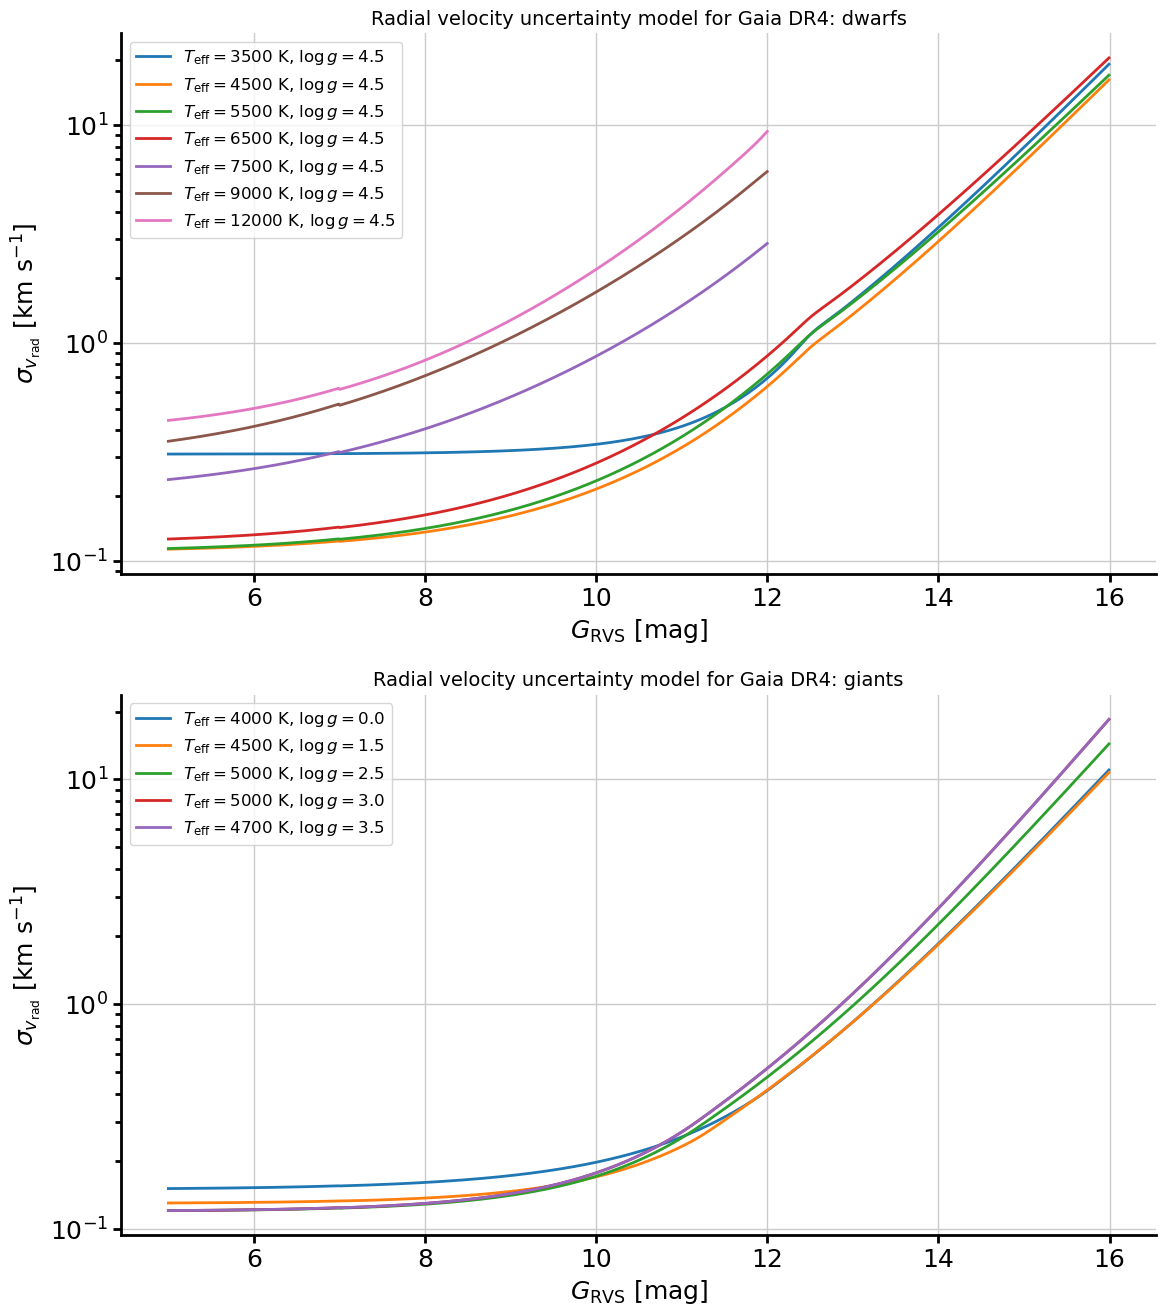

In [4]:
fig, axdr4 = plt.subplots(2, 1, figsize=(0.75*16,2*0.75*9), tight_layout=True)

rls = "dr4"

for t in dwarfs.keys():
    teff = np.full(grvs.shape, dwarfs[t]["teff"])
    logg = np.full(grvs.shape, dwarfs[t]["logg"])
    svrad = vradunc(grvs, teff, logg, release=rls)
    axdr4[0].semilogy(grvs, svrad, label=rf"$T_\mathrm{{eff}}={dwarfs[t]['teff']:.0f}$ K, $\log g={dwarfs[t]['logg']:.1f}$")
axdr4[0].set_xlabel(r"$G_\mathrm{RVS}$ [mag]")
axdr4[0].set_ylabel(r"$\sigma_{v_\mathrm{rad}}$ [km s$^{-1}$]")
axdr4[0].grid()
axdr4[0].set_title(f"Radial velocity uncertainty model for Gaia {rls.upper()}: dwarfs", fontsize=14)
axdr4[0].legend(fontsize=12)

for t in giants.keys():
    teff = np.full(grvs.shape, giants[t]["teff"])
    logg = np.full(grvs.shape, giants[t]["logg"])
    svrad = vradunc(grvs, teff, logg, release=rls)
    axdr4[1].semilogy(grvs, svrad, label=rf"$T_\mathrm{{eff}}={giants[t]['teff']:.0f}$ K, $\log g={giants[t]['logg']:.1f}$")
axdr4[1].set_xlabel(r"$G_\mathrm{RVS}$ [mag]")
axdr4[1].set_ylabel(r"$\sigma_{v_\mathrm{rad}}$ [km s$^{-1}$]")
axdr4[1].grid()
axdr4[1].set_title(f"Radial velocity uncertainty model for Gaia {rls.upper()}: giants", fontsize=14)
axdr4[1].legend(fontsize=12)

plt.show()

### Gaia DR5 uncertainty models

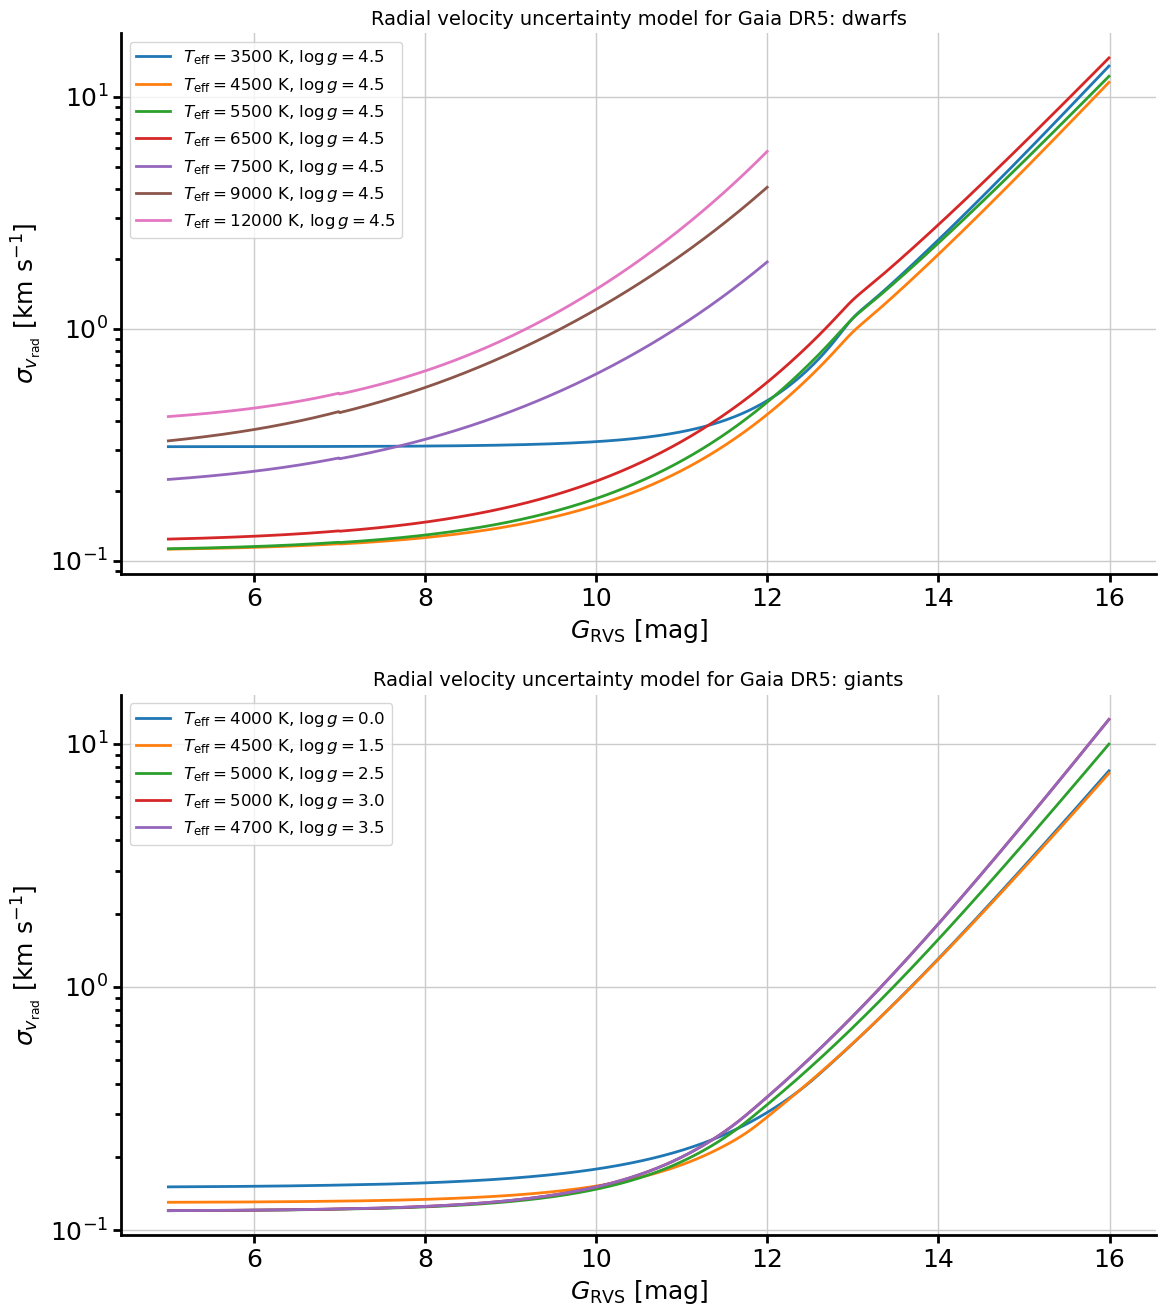

In [5]:
fig, axdr5 = plt.subplots(2, 1, figsize=(0.75*16,2*0.75*9), tight_layout=True)

rls = "dr5"

for t in dwarfs.keys():
    teff = np.full(grvs.shape, dwarfs[t]["teff"])
    logg = np.full(grvs.shape, dwarfs[t]["logg"])
    svrad = vradunc(grvs, teff, logg, release=rls)
    axdr5[0].semilogy(grvs, svrad, label=rf"$T_\mathrm{{eff}}={dwarfs[t]['teff']:.0f}$ K, $\log g={dwarfs[t]['logg']:.1f}$")
axdr5[0].set_xlabel(r"$G_\mathrm{RVS}$ [mag]")
axdr5[0].set_ylabel(r"$\sigma_{v_\mathrm{rad}}$ [km s$^{-1}$]")
axdr5[0].grid()
axdr5[0].set_title(f"Radial velocity uncertainty model for Gaia {rls.upper()}: dwarfs", fontsize=14)
axdr5[0].legend(fontsize=12)

for t in giants.keys():
    teff = np.full(grvs.shape, giants[t]["teff"])
    logg = np.full(grvs.shape, giants[t]["logg"])
    svrad = vradunc(grvs, teff, logg, release=rls)
    axdr5[1].semilogy(grvs, svrad, label=rf"$T_\mathrm{{eff}}={giants[t]['teff']:.0f}$ K, $\log g={giants[t]['logg']:.1f}$")
axdr5[1].set_xlabel(r"$G_\mathrm{RVS}$ [mag]")
axdr5[1].set_ylabel(r"$\sigma_{v_\mathrm{rad}}$ [km s$^{-1}$]")
axdr5[1].grid()
axdr5[1].set_title(f"Radial velocity uncertainty model for Gaia {rls.upper()}: giants", fontsize=14)
axdr5[1].legend(fontsize=12)

plt.show()

## Uncertainties in the Kiel diagram

Calculate the model unceratinties for a grid of $(T_\mathrm{eff}, \log g)$ values. This is to check that the different boxes defining the model validity ranges in in the Kiel diagram are correctly implemented.

In [6]:
ROOT = os.path.abspath(os.path.dirname("."))
with open(os.path.join(ROOT, "../src/pygaia/errors/data", "rv_uncertainty_model_coeffs.json")) as fp:
    rv_unc_model = ujson.load(fp)
    fp.close()

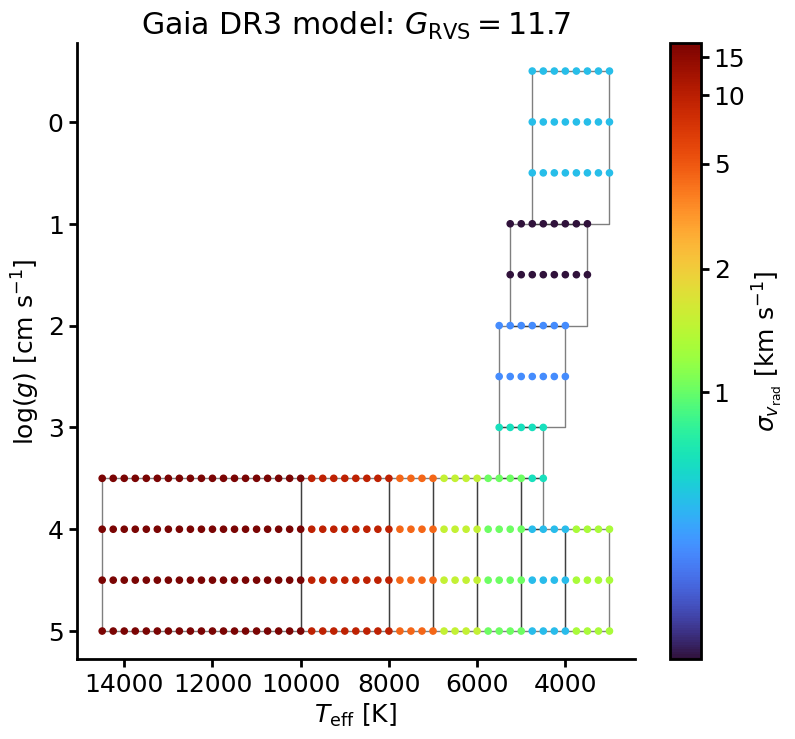

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9,8))

t, g = np.meshgrid(np.linspace(2500, 15000, 51), np.linspace(-0.5,5,12))
teff = t.flatten()
logg = g.flatten()
grvsval = 11.7
grvs = np.full(teff.shape, grvsval)

rls="dr3"
svrad = vradunc(grvs, teff, logg, release=rls)

boxes = []
for spt in rv_unc_model.keys():
    t = rv_unc_model[spt]["teff"][0]
    tw = rv_unc_model[spt]["teff"][1] - rv_unc_model[spt]["teff"][0]
    g = rv_unc_model[spt]["logg"][0]
    gw = rv_unc_model[spt]["logg"][1] - rv_unc_model[spt]["logg"][0]
    boxes.append(Rectangle((t,g), tw, gw, fill=False))
pc = PatchCollection(boxes, edgecolor='k', facecolor='none', alpha=0.5)
sc = ax.scatter(teff, logg, s=20, c=svrad, cmap='turbo')
ax.clear()
imnorm = ImageNormalize(sc.get_array(), stretch=LogStretch())
ax.add_collection(pc)
sc = ax.scatter(teff, logg, s=20, c=svrad, cmap='turbo', norm=imnorm)
cbar = fig.colorbar(sc, ax=ax, ticks=[1,2,5,10,15])
cbar.set_label(r"$\sigma_{v_\mathrm{rad}}$ [km s$^{-1}$]")
ax.set_xlabel(r"$T_\mathrm{eff}$ [K]")
ax.set_ylabel(r"$\log(g)$ [cm s$^{-1}$]")
ax.set_title(rf"Gaia {rls.upper()} model: $G_\mathrm{{RVS}}={grvsval:.1f}$")
ax.invert_xaxis()
ax.invert_yaxis()

plt.show()